# Calculcate Accident Rate, Data Analysis, & Conclusions

#### Project Members: Ming Gao, Monica Moussavi, Joey Picca, Rohan Kancharla

This notebook reads the collected data from the prior notebook, calculates fatal accident rate per day (for each city and precipitation category), and then makes our final plots and t-tests.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts

### Convert our master dataframe into accident rates

In [2]:
df=pd.read_csv("./data/clean/allCitiesAndWeather.csv", index_col=0)
df.head()

,Date,MaxTemp,MinTemp,Precipitation,County,Deaths,Case,Vehicles,City,Category
0,2014-01-01,69,31,0.0,DALLAS (113),1.0,480002.0,1.0,Dallas,Dry
1,2014-01-01,69,31,0.0,DALLAS (113),2.0,480003.0,2.0,Dallas,Dry
2,2014-01-01,69,31,0.0,DALLAS (113),1.0,480182.0,2.0,Dallas,Dry
3,2014-01-02,43,25,0.0,NaN,NaN,NaN,NaN,Dallas,Dry
4,2014-01-03,52,25,0.0,NaN,NaN,NaN,NaN,Dallas,Dry


##### create a new dictionary which has key="city name", value="mean of accident counts per day" in different categories of precipitation

In [3]:
# Get the list of cities
city_name=df["City"].unique()
categories=["Dry","Light","Moderate","Heavy","Very Heavy"]

# Create a dictionary to hold our accident rates for each city
cities={"Dallas":[],"Phoenix":[],"San Antonio":[],"Houston":[],"San Jose":[],"Los Angeles":[],\
        "New York City":[],"Philadelphia":[],"Chicago":[],"San Diego":[]}

# Loop through cities and precipitation categories to calculate mean fatal accident rate
for city in cities:
    for category in categories:
        subset = df[(df['City'] == city) & (df['Category'] == category)]
        stat = np.mean(subset.groupby('Date')['Case'].count())
        cities[city].append(stat)
cities

{'Dallas': [0.72217709179528833,
  0.66789667896678961,
  0.72251308900523559,
  0.63829787234042556,
  0.79487179487179482],
 'Phoenix': [1.1433121019108281,
  1.0952380952380953,
  0.82795698924731187,
  1.25,
  1.25],
 'San Antonio': [0.49076517150395776,
  0.4484536082474227,
  0.53926701570680624,
  0.5,
  0.35294117647058826],
 'Houston': [1.1080038572806172,
  1.0554089709762533,
  1.0252100840336134,
  1.1056910569105691,
  0.91836734693877553],
 'San Jose': [0.297464016449623,
  0.26589595375722541,
  0.35135135135135137,
  0.3611111111111111,
  1.0],
 'Los Angeles': [1.7963544940289127, 1.736, 2.0370370370370372, 2.0, 1.5],
 'New York City': [0.61824953445065178,
  0.49624060150375937,
  0.59561128526645768,
  0.6058394160583942,
  0.53333333333333333],
 'Philadelphia': [0.28468653648509762,
  0.21134020618556701,
  0.18892508143322476,
  0.21875,
  0.20000000000000001],
 'Chicago': [0.69422423556058888,
  0.65359477124183007,
  0.59195402298850575,
  0.5847457627118644,
  0.

##### Convert dictionary into dataframe and add a new column with precipitation categories
We will use this added column to help us make our seaborn charts.

In [4]:
accident_rate_dataset=pd.DataFrame(cities)
accident_rate_dataset["Category"]=categories
accident_rate_dataset

,Dallas,Phoenix,San Antonio,Houston,San Jose,Los Angeles,New York City,Philadelphia,Chicago,San Diego,Category
0,0.722177,1.143312,0.490765,1.108004,0.297464,1.796354,0.618250,0.284687,0.694224,0.611989,Dry
1,0.667897,1.095238,0.448454,1.055409,0.265896,1.736000,0.496241,0.211340,0.653595,0.623116,Light
2,0.722513,0.827957,0.539267,1.025210,0.351351,2.037037,0.595611,0.188925,0.591954,0.560976,Moderate
3,0.638298,1.250000,0.500000,1.105691,0.361111,2.000000,0.605839,0.218750,0.584746,0.904762,Heavy
4,0.794872,1.250000,0.352941,0.918367,1.000000,1.500000,0.533333,0.200000,0.333333,0.833333,Very Heavy


##### write "accident rate" csv.file

In [5]:
#accident_rate_dataset.to_csv("accident_rate_dataset.csv")

### Data Visualization

In [6]:
# "Melting" our dataframe creates only one column with numeric values, such that seaborn can readily plot it.
melt1=pd.melt(accident_rate_dataset, id_vars=['Category'], var_name='City')

melt1.head(10)

,Category,City,value
0,Dry,Dallas,0.722177
1,Light,Dallas,0.667897
2,Moderate,Dallas,0.722513
3,Heavy,Dallas,0.638298
4,Very Heavy,Dallas,0.794872
5,Dry,Phoenix,1.143312
6,Light,Phoenix,1.095238
7,Moderate,Phoenix,0.827957
8,Heavy,Phoenix,1.250000
9,Very Heavy,Phoenix,1.250000


### All Cities: Dry,Light,Moderate Precip Fatal Accident Rates

In [7]:
# Filter our dataframe so we only have our desired categories
graph1=melt1[(melt1['Category'] == 'Dry') | (melt1['Category'] == 'Light') | (melt1['Category'] == 'Moderate')]
graph1.head(10)

,Category,City,value
0,Dry,Dallas,0.722177
1,Light,Dallas,0.667897
2,Moderate,Dallas,0.722513
5,Dry,Phoenix,1.143312
6,Light,Phoenix,1.095238
7,Moderate,Phoenix,0.827957
10,Dry,San Antonio,0.490765
11,Light,San Antonio,0.448454
12,Moderate,San Antonio,0.539267
15,Dry,Houston,1.108004


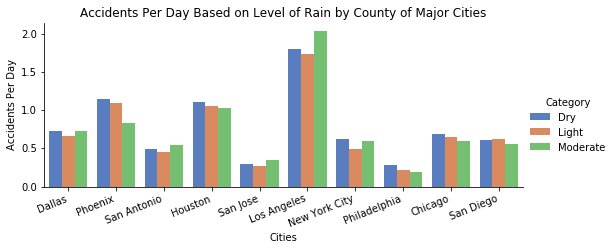

In [8]:
# Construct our seaborn catplot
g1 = sns.catplot(x="City", y="value", hue="Category", data=graph1,
                height=3,aspect=2.5,kind="bar", palette="muted")
g1.set_xticklabels(rotation=22, horizontalalignment='right')

g1.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities')
plt.show()

### All Cities: Dry,Heavy,Very Heavy Precip Fatal Accident Rates

In [9]:
graph2=melt1[(melt1['Category'] == 'Dry') | (melt1['Category'] == 'Heavy') | (melt1['Category'] == 'Very Heavy')]
graph2.head(10)

,Category,City,value
0,Dry,Dallas,0.722177
3,Heavy,Dallas,0.638298
4,Very Heavy,Dallas,0.794872
5,Dry,Phoenix,1.143312
8,Heavy,Phoenix,1.250000
9,Very Heavy,Phoenix,1.250000
10,Dry,San Antonio,0.490765
13,Heavy,San Antonio,0.500000
14,Very Heavy,San Antonio,0.352941
15,Dry,Houston,1.108004


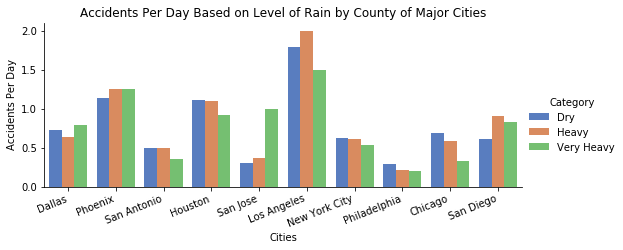

In [10]:
g2 = sns.catplot(x="City", y="value", hue="Category", data=graph2,
                height=3,aspect=2.5,kind="bar", palette="muted")
g2.set_xticklabels(rotation=22, horizontalalignment='right')

g2.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities')
plt.show()

### "Wet" Cities: Dry,Light,Moderate Precip Fatal Accident Rates

In [11]:
graph3=graph1[(graph1['City'] == 'Dallas') | (graph1['City'] == 'San Antonio') | (graph1['City'] == 'Houston')| (graph1['City'] == 'New York City')| (graph1['City'] == 'Philadelphia')| (graph1['City'] == 'Chicago')]
graph3.head(10)

,Category,City,value
0,Dry,Dallas,0.722177
1,Light,Dallas,0.667897
2,Moderate,Dallas,0.722513
10,Dry,San Antonio,0.490765
11,Light,San Antonio,0.448454
12,Moderate,San Antonio,0.539267
15,Dry,Houston,1.108004
16,Light,Houston,1.055409
17,Moderate,Houston,1.025210
30,Dry,New York City,0.618250


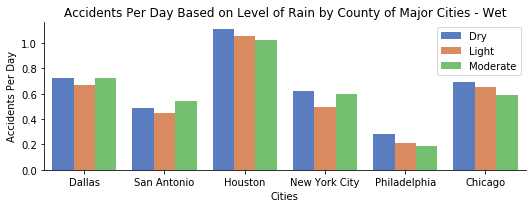

In [12]:
g3 = sns.catplot(x="City", y="value", hue="Category", data=graph3,
                height=3,aspect=2.5,kind="bar", palette="muted", legend=False)


g3.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities - Wet')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### "Wet" Cities: Dry,Heavy,Very Heavy Precip Fatal Accident Rates

In [13]:
graph4=graph2[(graph2['City'] == 'Dallas') | (graph2['City'] == 'San Antonio') | (graph2['City'] == 'Houston')| (graph2['City'] == 'New York City')| (graph2['City'] == 'Philadelphia')| (graph2['City'] == 'Chicago')]
graph4.head(10)

,Category,City,value
0,Dry,Dallas,0.722177
3,Heavy,Dallas,0.638298
4,Very Heavy,Dallas,0.794872
10,Dry,San Antonio,0.490765
13,Heavy,San Antonio,0.500000
14,Very Heavy,San Antonio,0.352941
15,Dry,Houston,1.108004
18,Heavy,Houston,1.105691
19,Very Heavy,Houston,0.918367
30,Dry,New York City,0.618250


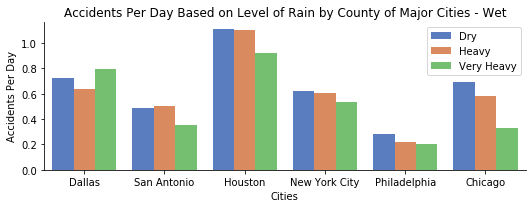

In [14]:
g4 = sns.catplot(x="City", y="value", hue="Category", data=graph4,
                height=3,aspect=2.5,kind="bar", palette="muted", legend=False)


g4.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities - Wet')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### "Dry" Cities: Dry,Light,Moderate Precip Fatal Accident Rates

In [15]:
graph5=graph1[(graph1['City'] == 'Phoenix') | (graph1['City'] == 'Los Angeles') | (graph1['City'] == 'San Jose')| (graph1['City'] == 'San Diego')]
graph5.head(10)

,Category,City,value
5,Dry,Phoenix,1.143312
6,Light,Phoenix,1.095238
7,Moderate,Phoenix,0.827957
20,Dry,San Jose,0.297464
21,Light,San Jose,0.265896
22,Moderate,San Jose,0.351351
25,Dry,Los Angeles,1.796354
26,Light,Los Angeles,1.736000
27,Moderate,Los Angeles,2.037037
45,Dry,San Diego,0.611989


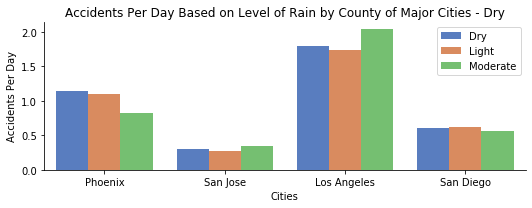

In [16]:
g5 = sns.catplot(x="City", y="value", hue="Category", data=graph5,
                height=3,aspect=2.5,kind="bar", palette="muted",legend=False)


g5.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities - Dry')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### "Dry" Cities: Dry,Heavy,Very Heavy Precip Fatal Accident Rates

In [17]:
graph6=graph2[(graph2['City'] == 'Phoenix') | (graph2['City'] == 'Los Angeles') | (graph2['City'] == 'San Jose')| (graph2['City'] == 'San Diego')]
graph6.head(10)

,Category,City,value
5,Dry,Phoenix,1.143312
8,Heavy,Phoenix,1.250000
9,Very Heavy,Phoenix,1.250000
20,Dry,San Jose,0.297464
23,Heavy,San Jose,0.361111
24,Very Heavy,San Jose,1.000000
25,Dry,Los Angeles,1.796354
28,Heavy,Los Angeles,2.000000
29,Very Heavy,Los Angeles,1.500000
45,Dry,San Diego,0.611989


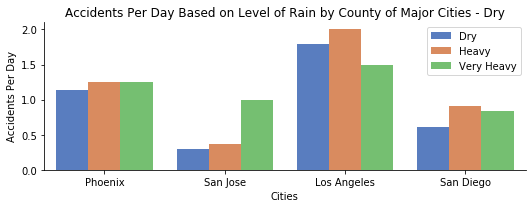

In [18]:
g6 = sns.catplot(x="City", y="value", hue="Category", data=graph6,
                height=3,aspect=2.5,kind="bar", palette="muted",legend=False)
 


g6.set_axis_labels('Cities', 'Accidents Per Day')
plt.title('Accidents Per Day Based on Level of Rain by County of Major Cities - Dry')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Statistical Analysis

#####  Break the cities into our two groups based on initial analysis of total rainfall by City from 2014-2018

In [19]:
df_bad = accident_rate_dataset[['Dallas','San Antonio','Houston','New York City','Philadelphia','Chicago','Category']]
df_nice = accident_rate_dataset[['Phoenix','San Jose','Los Angeles','San Diego','Category']]

In [20]:
df_bad

,Dallas,San Antonio,Houston,New York City,Philadelphia,Chicago,Category
0,0.722177,0.490765,1.108004,0.618250,0.284687,0.694224,Dry
1,0.667897,0.448454,1.055409,0.496241,0.211340,0.653595,Light
2,0.722513,0.539267,1.025210,0.595611,0.188925,0.591954,Moderate
3,0.638298,0.500000,1.105691,0.605839,0.218750,0.584746,Heavy
4,0.794872,0.352941,0.918367,0.533333,0.200000,0.333333,Very Heavy


In [21]:
df_nice

,Phoenix,San Jose,Los Angeles,San Diego,Category
0,1.143312,0.297464,1.796354,0.611989,Dry
1,1.095238,0.265896,1.736000,0.623116,Light
2,0.827957,0.351351,2.037037,0.560976,Moderate
3,1.250000,0.361111,2.000000,0.904762,Heavy
4,1.250000,1.000000,1.500000,0.833333,Very Heavy


##### Create a list to hold our p-values

In [22]:
pvalues = []

###### Change in Fatal Accident Rate from Dry to Light Precipitation: T-Test

In [23]:
# Calculate the fractional change for each city and run the two independent group t-test
light_bad = ((df_bad.iloc[1,0:6] - df_bad.iloc[0,0:6])/df_bad.iloc[0,0:6]).tolist()
light_nice = ((df_nice.iloc[1,0:4] - df_nice.iloc[0,0:4])/df_nice.iloc[0,0:4]).tolist()
sts.ttest_ind(light_bad,light_nice,equal_var=False)

Ttest_indResult(statistic=-1.8299167917538479, pvalue=0.10479922027807929)

In [24]:
pvalues.append(sts.ttest_ind(light_bad,light_nice,equal_var=False)[1])

###### Change in Fatal Accident Rate from Dry to Moderate Precipitation: T-Test

In [25]:
# Calculate the fractional change for each city and run the two independent group t-test
moderate_bad = ((df_bad.iloc[2,0:6] - df_bad.iloc[0,0:6])/df_bad.iloc[0,0:6]).tolist()
moderate_nice = ((df_nice.iloc[2,0:4] - df_nice.iloc[0,0:4])/df_nice.iloc[0,0:4]).tolist()
sts.ttest_ind(moderate_bad,moderate_nice,equal_var=False)

Ttest_indResult(statistic=-0.58873603706524247, pvalue=0.58167059170727498)

In [26]:
pvalues.append(sts.ttest_ind(moderate_bad,moderate_nice,equal_var=False)[1])

###### Change in Fatal Accident Rate from Dry to Heavy Precipitation: T-Test

In [27]:
# Calculate the fractional change for each city and run the two independent group t-test
heavy_bad = ((df_bad.iloc[3,0:6] - df_bad.iloc[0,0:6])/df_bad.iloc[0,0:6]).tolist()
heavy_nice = ((df_nice.iloc[3,0:4] - df_nice.iloc[0,0:4])/df_nice.iloc[0,0:4]).tolist()
sts.ttest_ind(heavy_bad,heavy_nice,equal_var=False)

Ttest_indResult(statistic=-3.17629218092857, pvalue=0.030571293647607953)

In [28]:
pvalues.append(sts.ttest_ind(heavy_bad,heavy_nice,equal_var=False)[1])

###### Change in Fatal Accident Rate from Dry to Very Heavy Precipitation: T-Test

In [29]:
# Calculate the fractional change for each city and run the two independent group t-test
very_heavy_bad = ((df_bad.iloc[4,0:6] - df_bad.iloc[0,0:6])/df_bad.iloc[0,0:6]).tolist()
very_heavy_nice = ((df_nice.iloc[4,0:4] - df_nice.iloc[0,0:4])/df_nice.iloc[0,0:4]).tolist()
sts.ttest_ind(very_heavy_bad,very_heavy_nice,equal_var=False)

Ttest_indResult(statistic=-1.5118470232805001, pvalue=0.22413214852168137)

In [30]:
pvalues.append(sts.ttest_ind(very_heavy_bad,very_heavy_nice,equal_var=False)[1])

##### p-values visualization

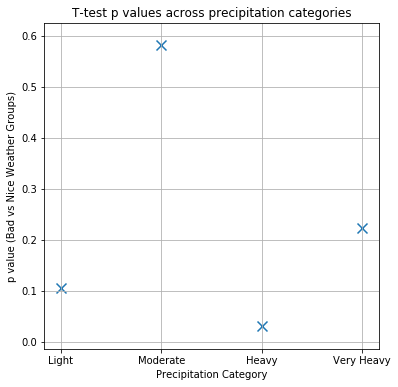

In [31]:
# Construct a plot showing our p values
fig,ax = plt.subplots(figsize=(6,6))

plt.scatter(np.arange(0,4),pvalues,s=100,marker='x')
plt.grid('True')
plt.xticks(np.arange(0,4),labels=['Light','Moderate','Heavy','Very Heavy'])
plt.xlabel('Precipitation Category')
plt.ylabel('p value (Bad vs Nice Weather Groups)')
plt.title('T-test p values across precipitation categories')
plt.show()

### Conclusions

In three of the four precipitation categories (Light, Moderate, Very Heavy), higher p values indicate that we cannot reject the null hypothesis H0: 
 - *For the top 10 cities by population, cities with typically drier weather (as determined by average annual precipitation) do not observe a change in fatal accident rate on rainy days that is statistically different from the change in rate for cities with typically wetter weather.*

---
For the last category (Heavy: Precipitation of 0.5"-1.49"), we obtained a p-value of approximately 0.03. In this category, our wetter cities observed a mean decrease in fatal accident rate of 8.5%, while our drier cities observed a mean increase in fatal accident rate of 22.5%. 

For the case of heavy rain days, this p-value tells us that if we assume H0 to be true, there is only a 3% probability that we would observe a difference between our groups that is at least this extreme.